In [5]:
from __future__ import print_function


from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import networkx as nx
import cartopy.crs as ccrs
#from dateutil.relativedelta import relativedelta
#from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [2]:
dtypes_carriers = {'Year': 'int32', 'Month': 'int32', 'DayofMonth': 'int32', 'DayOfWeek': 'int32', 'DepTime': 'float32', 
          'CRSDepTime': 'int32', 'ArrTime': 'float32', 'CRSArrTime': 'int32', 'UniqueCarrier': 'str', 
          'FlightNum': 'int32', 'TailNum': 'str', 'ActualElapsedTime': 'float32', 'CRSElapsedTime': 'float32',
          'AirTime': 'float32', 'ArrDelay': 'float32', 'DepDelay': 'float32', 'Origin': 'str', 'Dest': 'str',
          'Distance': 'int32', 'TaxiIn': 'float32', 'TaxiOut': 'float32', 'Cancelled': 'int32',
          'CancellationCode': 'str', 'Diverted': 'int32', 'CarrierDelay': 'float32', 'WeatherDelay': 'float32', 
          'NASDelay': 'float32', 'SecurityDelay': 'float32', 'LateAircraftDelay': 'float32'}

dtypes_airports = {'iata': 'str', 'airport': 'str', 'city': 'str',
                   'state': 'str', 'country': 'str', 'lat': 'float32', 'long': 'float32'}

dtypes_carriers = {'Code': 'str', 'Description': 'str'}

df_all = pd.concat([pd.read_csv('input/2007.csv', dtype=dtypes_carriers), 
                    pd.read_csv('input/2008.csv', dtype=dtypes_carriers)])
df_airports = pd.read_csv('input/airports.csv', dtype=dtypes_airports)
df_carriers = pd.read_csv('input/carriers.csv', dtype=dtypes_carriers)
df_carriers.loc[1308] = 'US Airways Inc.'
df_all = df_all.merge(right=df_carriers, how='left', left_on='UniqueCarrier', right_on='Code')
df_all = df_all.merge(right=df_airports,how='left', left_on='Origin', right_on='iata')
df_all = df_all.merge(right=df_airports,how='left', left_on='Dest', right_on='iata')
df = df_all[df_all['UniqueCarrier']=='WN']

In [3]:
df_all['GroundSpeed'] = df_all['Distance']/(df_all['ActualElapsedTime']/60)
df_all['GroundSpeed'] = df_all['GroundSpeed'].replace([np.inf, -np.inf], np.nan).dropna()

for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    df.loc[df['CancellationCode'] == 'A', 'CarrierCancelation'] = 1
    df.loc[df['CancellationCode'] == 'B', 'WeatherCancelation'] = 1
    df.loc[df['CancellationCode'] == 'C', 'NasCancelation'] = 1
    df.loc[df['CancellationCode'] == 'D', 'SecurityCancelation'] = 1
df['lon-lat'] = df[['long_x', 'lat_x']].apply(tuple, axis=1)
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
df.index = df['DepDate']

/home/zibski/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/zibski/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/zibski/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [36]:
def univariate(df):

    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']
    
    for col in df.columns:
        if col in categorical_columns:
            pass
        else:
            fig = plt.figure(figsize=(6, 6))
            ax = plt.axes()
            plt.hold(True)

            bp = sns.boxplot(y=col, data=df, palette='RdBu_r')
            plt.title('Boxplots of feature '+col, fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.axes().get_yaxis().get_label().set_visible(False)
            plt.axes().get_xaxis().get_label().set_visible(False)
            L=plt.legend(fontsize=14, loc=2)
            plt.show()
            plt.close()

/home/zibski/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/zibski/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/zibski/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/zibski/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppre

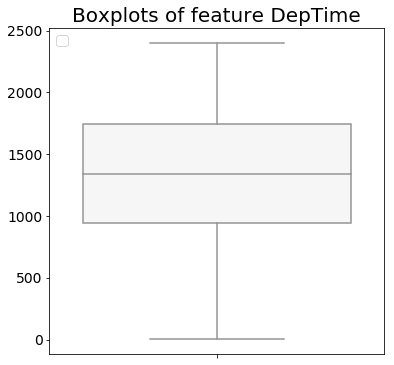

No handles with labels found to put in legend.


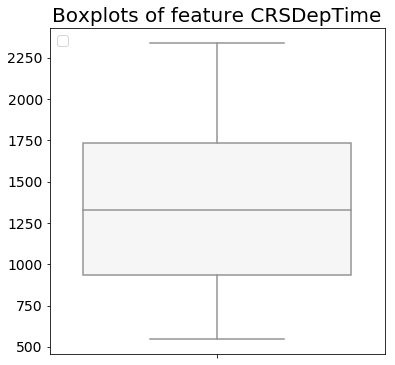

No handles with labels found to put in legend.


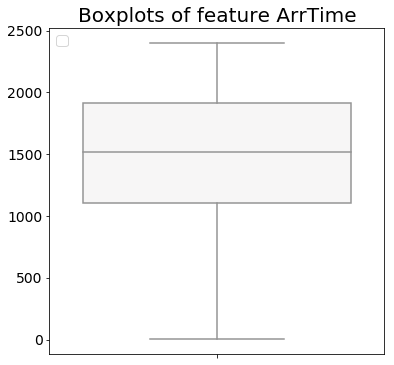

No handles with labels found to put in legend.


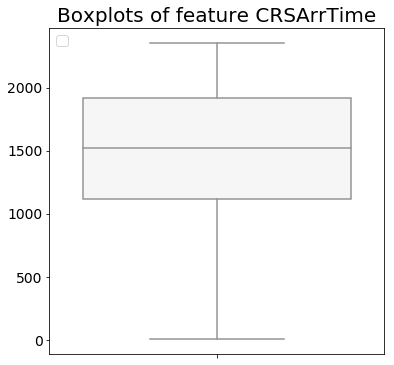

No handles with labels found to put in legend.


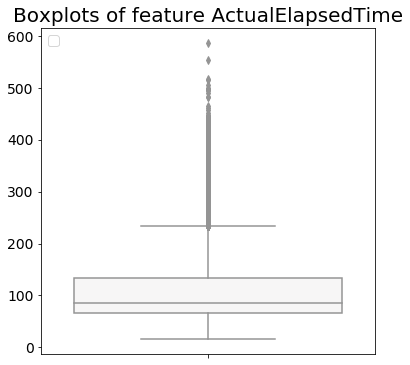

No handles with labels found to put in legend.


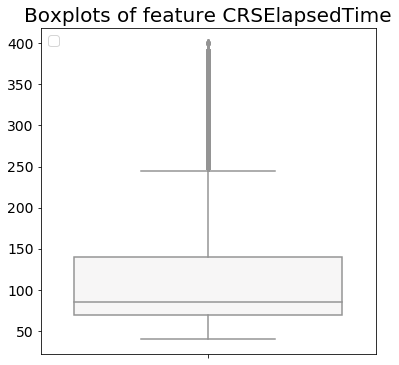

No handles with labels found to put in legend.


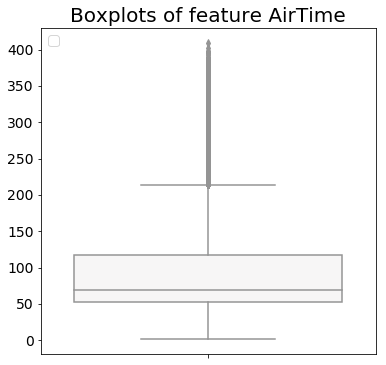

No handles with labels found to put in legend.


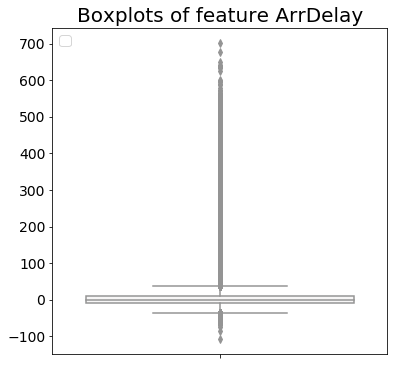

No handles with labels found to put in legend.


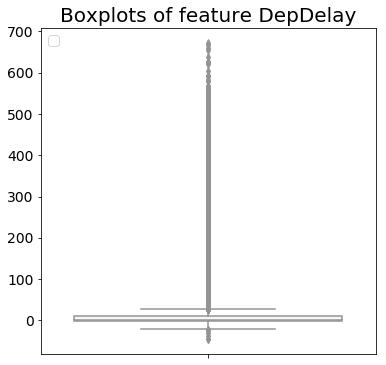

No handles with labels found to put in legend.


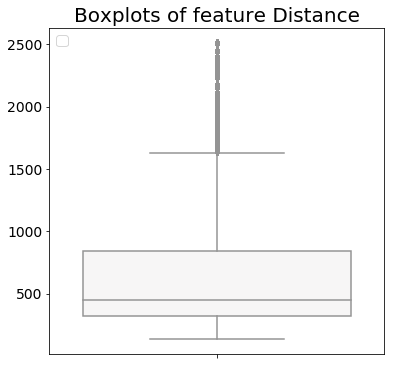

No handles with labels found to put in legend.


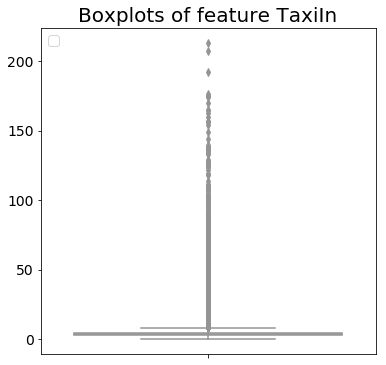

No handles with labels found to put in legend.


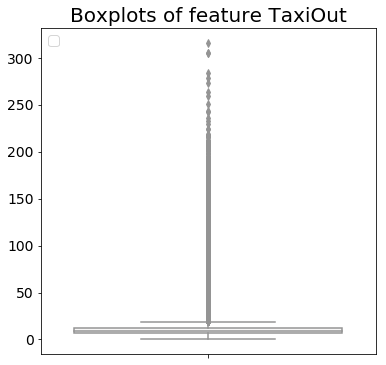

No handles with labels found to put in legend.


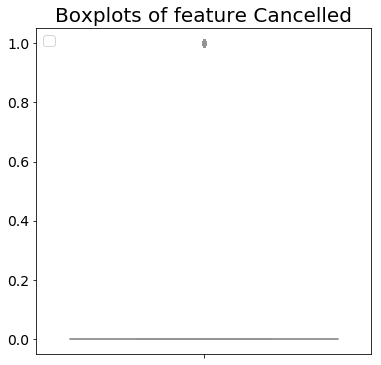

No handles with labels found to put in legend.


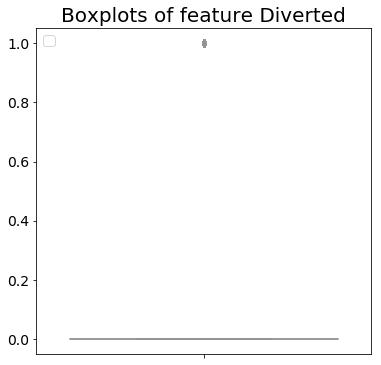

No handles with labels found to put in legend.


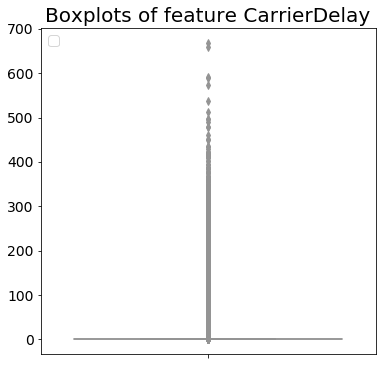

No handles with labels found to put in legend.


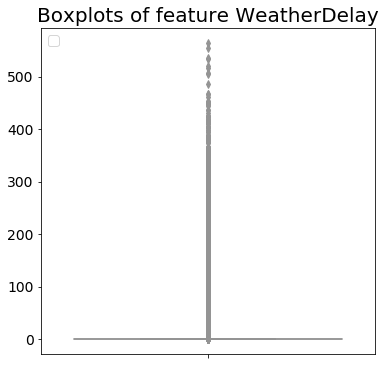

No handles with labels found to put in legend.


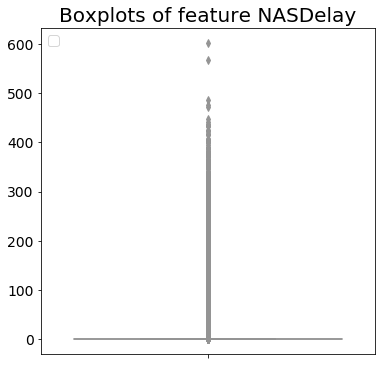

No handles with labels found to put in legend.


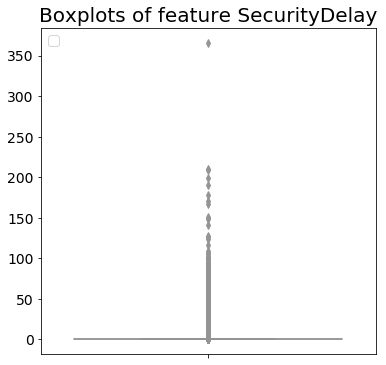

No handles with labels found to put in legend.


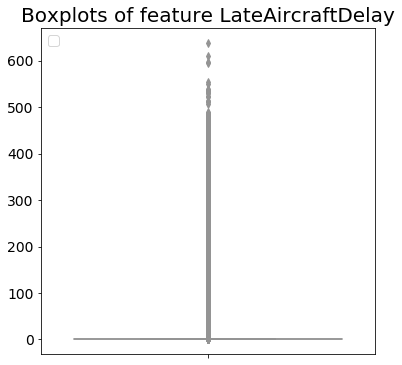

KeyboardInterrupt: 

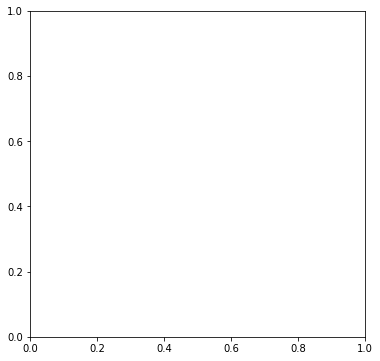

In [37]:
univariate(df)

In [6]:
def bivariate(df):
    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']

    columns_all = df.columns.tolist()         #columns in every dataframe are the same
    columns_keep = set(columns_all) - set(categorical_columns)
    
    cor = df[list(columns_keep)].corr()
    
    fig = plt.figure(figsize=(30, 30))
    hm = sns.heatmap(cor, annot=True, fmt=".2f", cmap='RdBu_r')
    plt.title('Heatmap of features for SowthWest carrier', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=25)
    plt.show()
    
    cor = df[list(columns_keep)].corr().abs()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    cor = cor*mask
    np.fill_diagonal(cor.values, -2)
    s = cor.unstack()
    s= s.sort_values(ascending=False)
    df_corr = pd.DataFrame(s, columns=['Correlation'])
    df_corr = df_corr.sort_values(by='Correlation', ascending=False)
    df_corr = df_corr[df_corr['Correlation']>0.7]
    print('Table of features Pearson correlation coefficients (corr > 0.7) for Sowthwest airlines\n')
    print(df_corr)

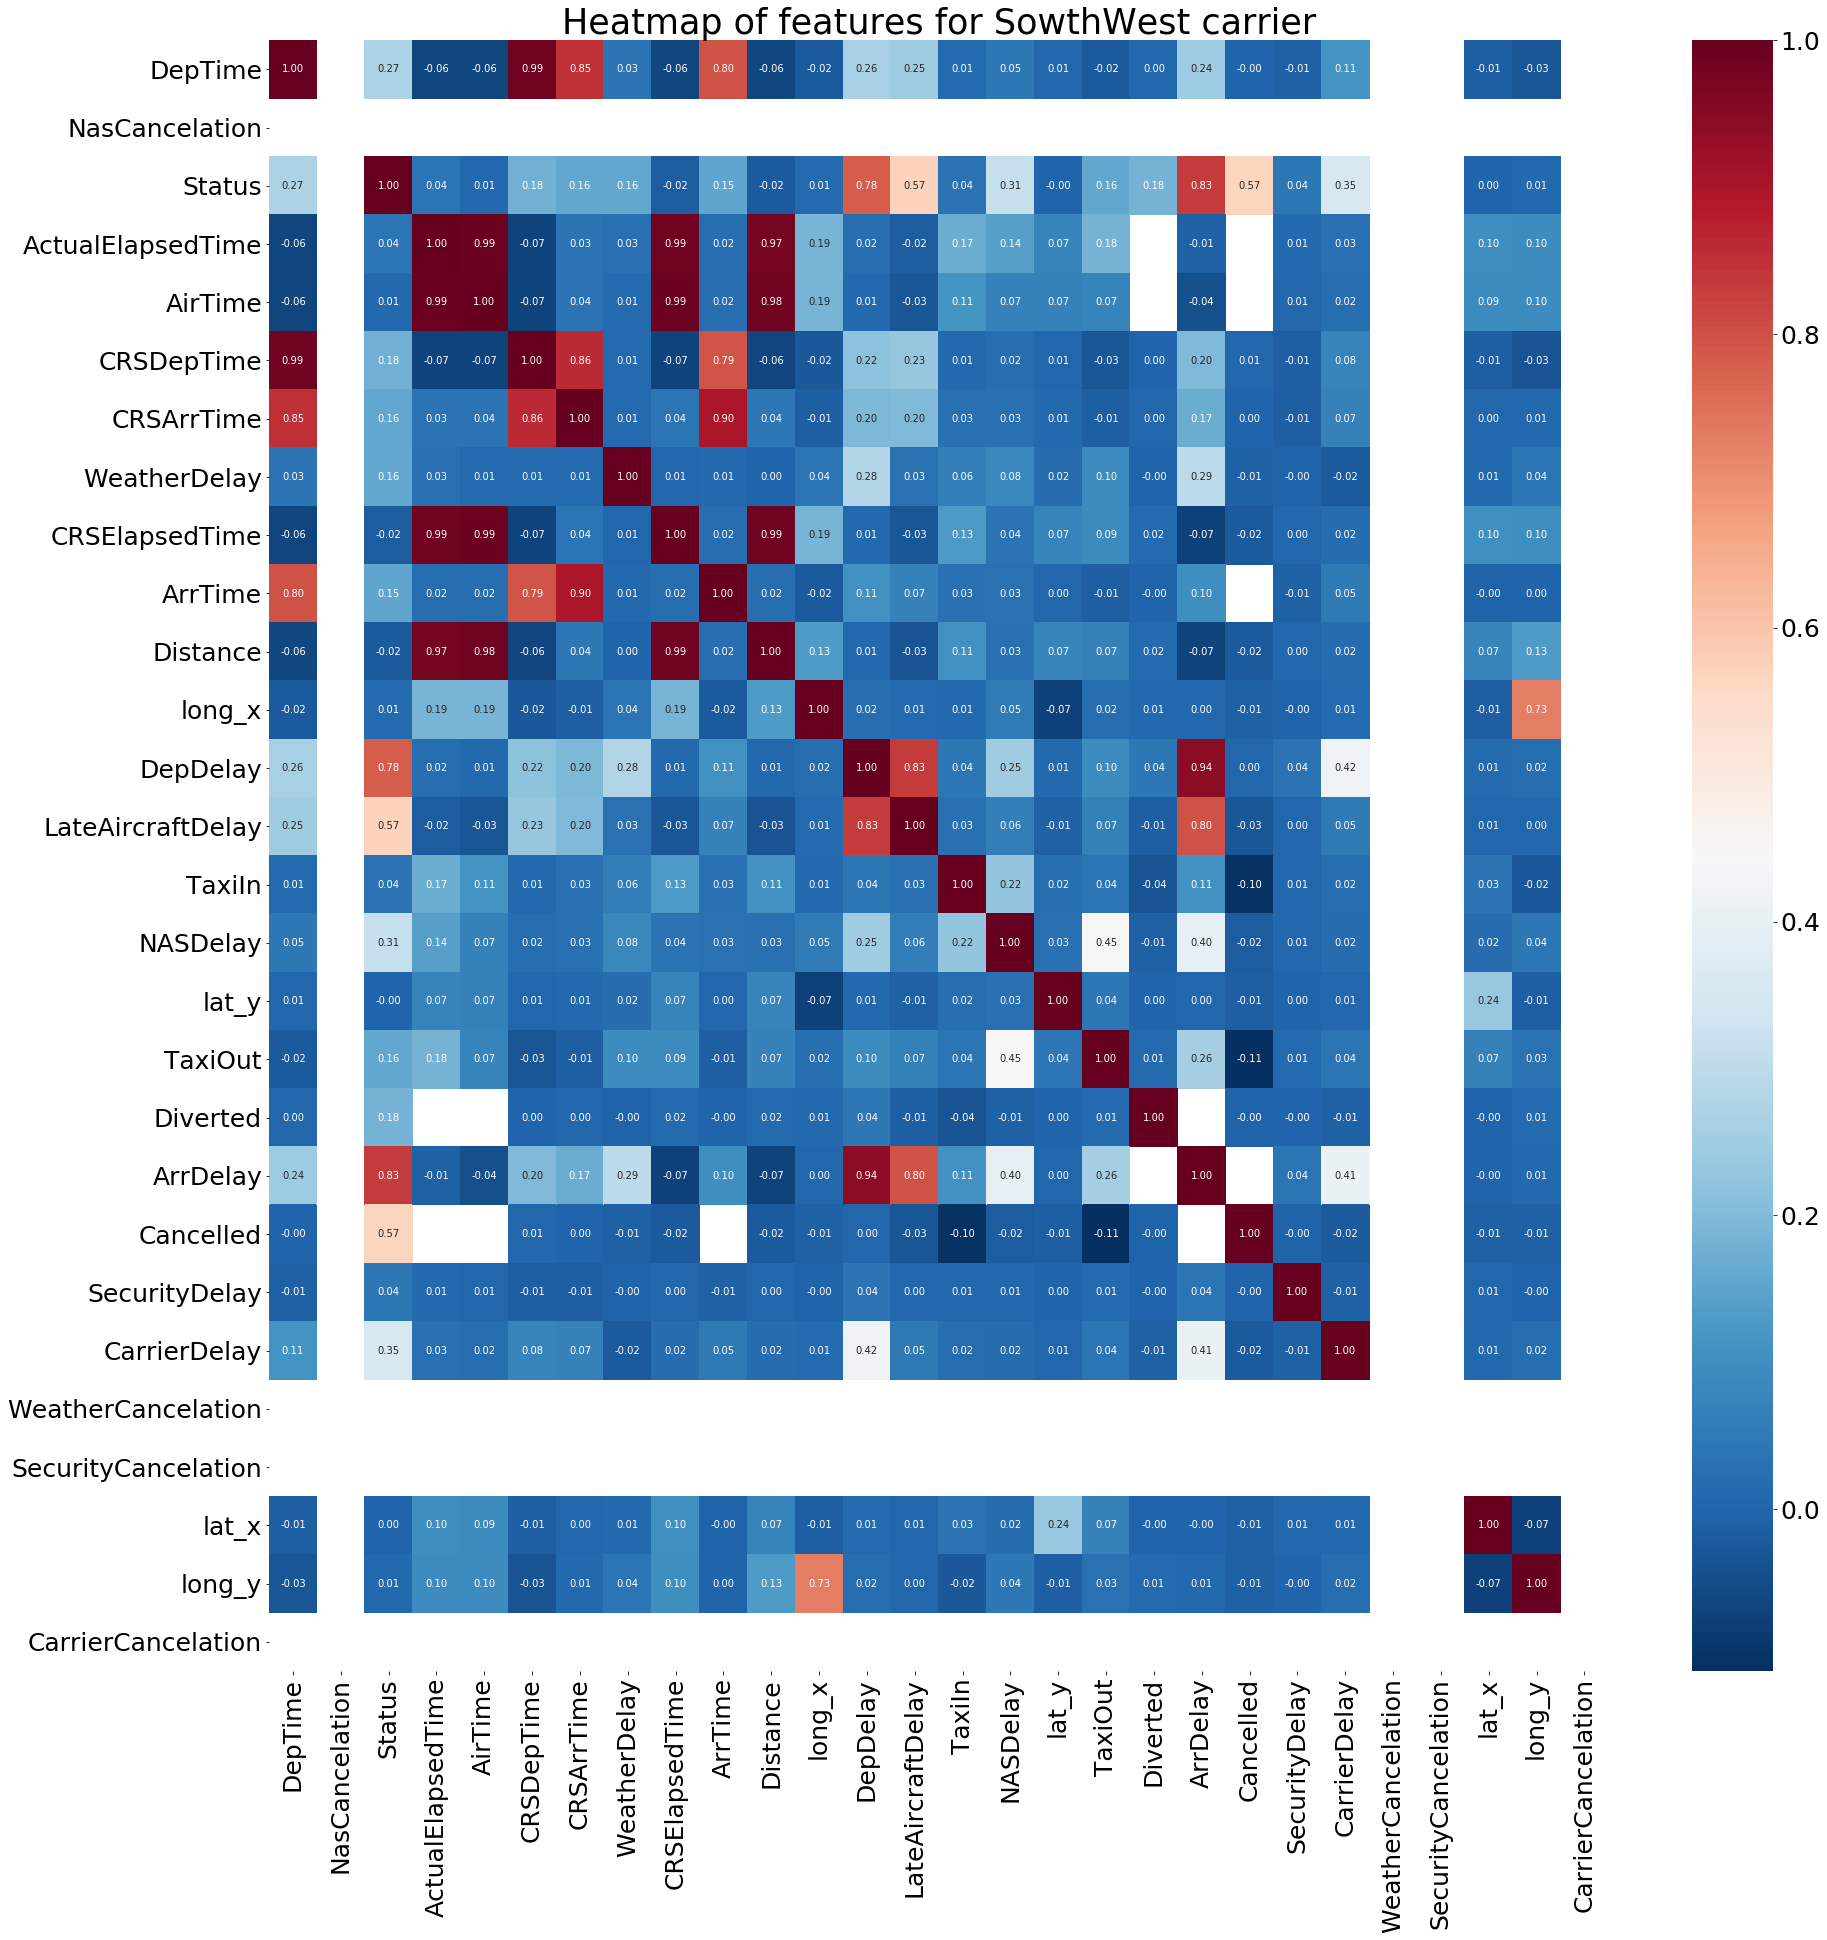

Table of features Pearson correlation coefficients (corr > 0.7) for Sowthwest airlines

                                     Correlation
AirTime           ActualElapsedTime     0.992424
CRSElapsedTime    AirTime               0.989919
Distance          CRSElapsedTime        0.985657
CRSElapsedTime    ActualElapsedTime     0.985285
CRSDepTime        DepTime               0.985033
Distance          AirTime               0.982743
                  ActualElapsedTime     0.974709
ArrDelay          DepDelay              0.943280
ArrTime           CRSArrTime            0.897209
CRSArrTime        CRSDepTime            0.860557
                  DepTime               0.848977
ArrDelay          Status                0.832753
LateAircraftDelay DepDelay              0.831047
ArrDelay          LateAircraftDelay     0.798953
ArrTime           DepTime               0.797991
                  CRSDepTime            0.794172
DepDelay          Status                0.782028
long_y            long_x      

In [7]:
bivariate(df)

In [67]:
y2.iloc[1].values[0]

1201754

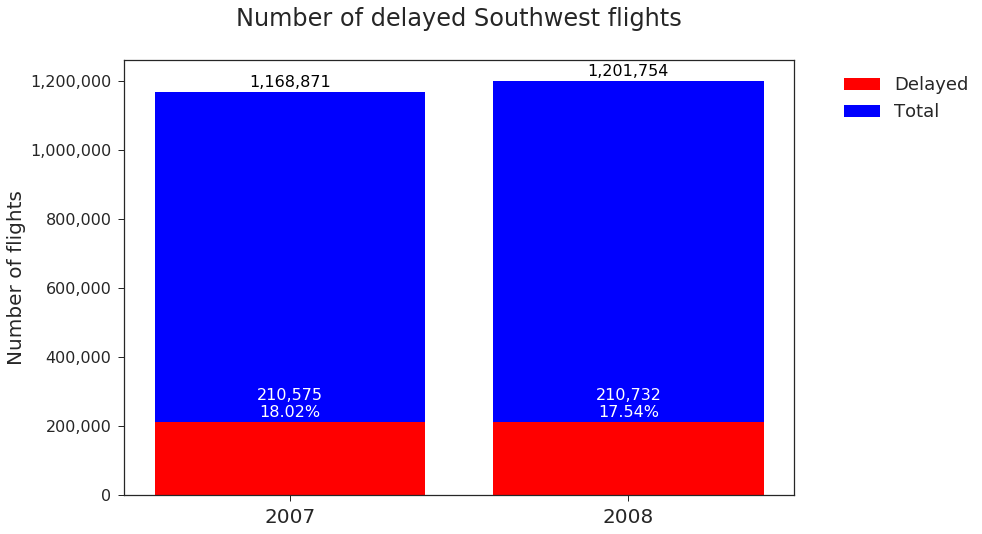

In [127]:
y1 = df[df['ArrDelay']>15][['Year','ArrDelay']].groupby(['Year']).count()
y2 = df[['Year', 'Month']].groupby(['Year']).count()

width = 0.35 

fig = plt.figure(figsize=(12, 8))


p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(len(y1),) - y1.values.reshape(2,)),
             bottom=y1.values.reshape(len(y1),), color='blue')

plt.ylabel('Number of flights', fontsize=20)
plt.title('Number of delayed Southwest flights\n', fontsize=24)
plt.legend(['Delayed', 'Total'], fontsize=18, bbox_to_anchor=(1.05, 1))
plt.xticks(y1.index,('2007', '2008'), fontsize=20)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
i=0
for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 15000, str(format(y1.iloc[i].values[0], ',')) + '\n' + str(round(100*y1.iloc[i].values[0]/y2.iloc[i].values[0],2)) + '%',
                    ha='center', color='white', fontsize=16)
    i+=1
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 15000, format(y2.iloc[i].values[0], ','),
                    ha='center', color='black', fontsize=16)
    i+=1
    
plt.show()

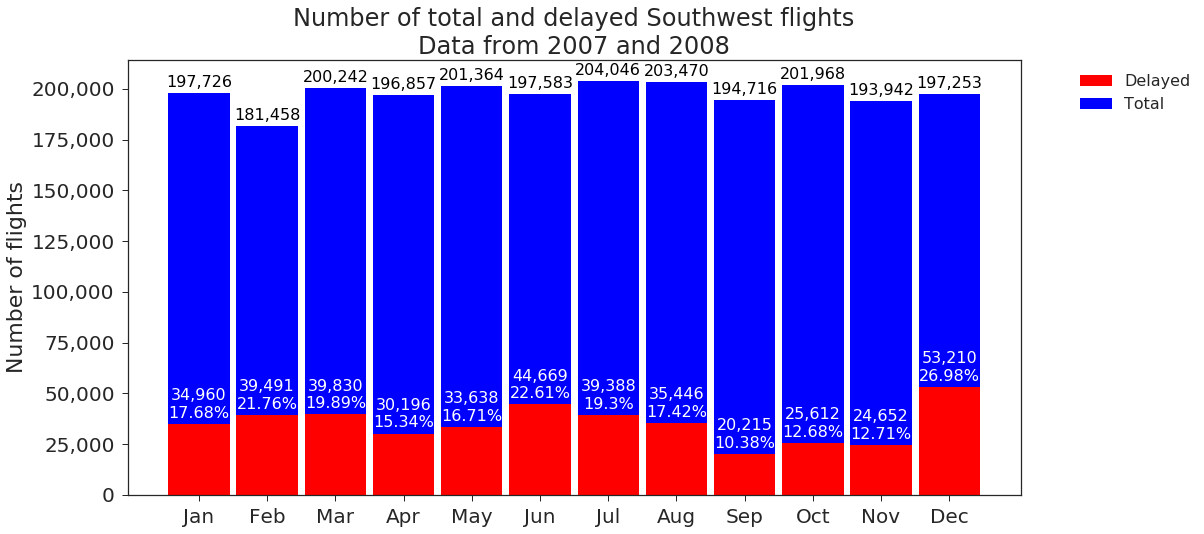

In [125]:
y1 = df[df['ArrDelay']>15][['Month','ArrDelay']].groupby(['Month']).count()
y2 = df[['Year', 'Month']].groupby(['Month']).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red', width=0.9)
p2 = plt.bar(y2.index, (y2.values.reshape(len(y2),) - y1.values.reshape(len(y1),)),
             bottom=y1.values.reshape(len(y1),), color='blue', width=0.9)

plt.ylabel('Number of flights', fontsize=22)
plt.title('Number of total and delayed Southwest flights\nData from 2007 and 2008', fontsize=24)
plt.legend(['Delayed', 'Total'], fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(y1.index,(Months), fontsize=20)
plt.yticks(fontsize=20)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

i=0
for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, str(format(y1.iloc[i].values[0], ',')) + '\n' + str(round(100*y1.iloc[i].values[0]/y2.iloc[i].values[0],2)) + '%',
                    ha='center', color='white', fontsize=16)
    i+=1
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 3000, format(y2.iloc[i].values[0], ','),
                    ha='center', color='black', fontsize=16)
    i+=1

plt.show()

In [90]:
y1.values[0][0]

57814

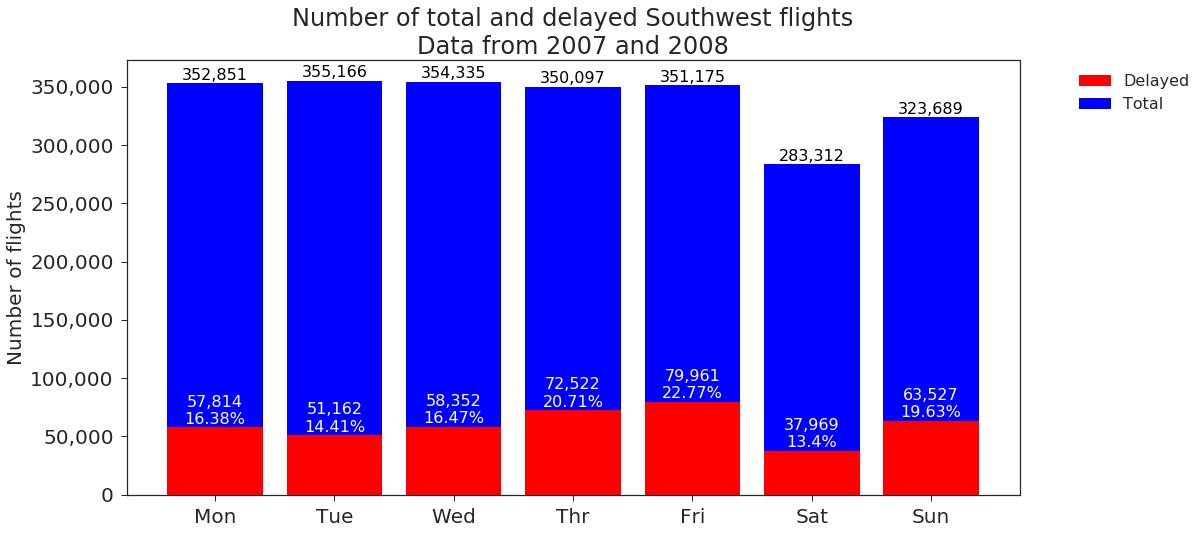

In [135]:
y1 = df[df['ArrDelay']>15][['ArrDelay']].groupby([df[df['ArrDelay']>15].index.dayofweek]).count()
y2 = df[['Month']].groupby([df.index.dayofweek]).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Days = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']

p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(len(y2),) - y1.values.reshape(len(y1),)),
             bottom=y1.values.reshape(len(y1),), color='blue')

plt.ylabel('Number of flights', fontsize=20)
plt.title('Number of total and delayed Southwest flights\nData from 2007 and 2008', fontsize=24)
plt.legend(['Delayed', 'Total'], fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(y1.index,(Days), fontsize=20)
plt.yticks(fontsize=20)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

i=0
for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, str(format(y1.iloc[i].values[0], ',')) + '\n' + str(round(100*y1.iloc[i].values[0]/y2.iloc[i].values[0],2)) + '%',
                    ha='center', color='white', fontsize=16)
    i+=1
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    y2.values[i][0] + 3000, format(y2.iloc[i].values[0], ','),
                    ha='center', color='black', fontsize=16)
    i+=1
plt.show()

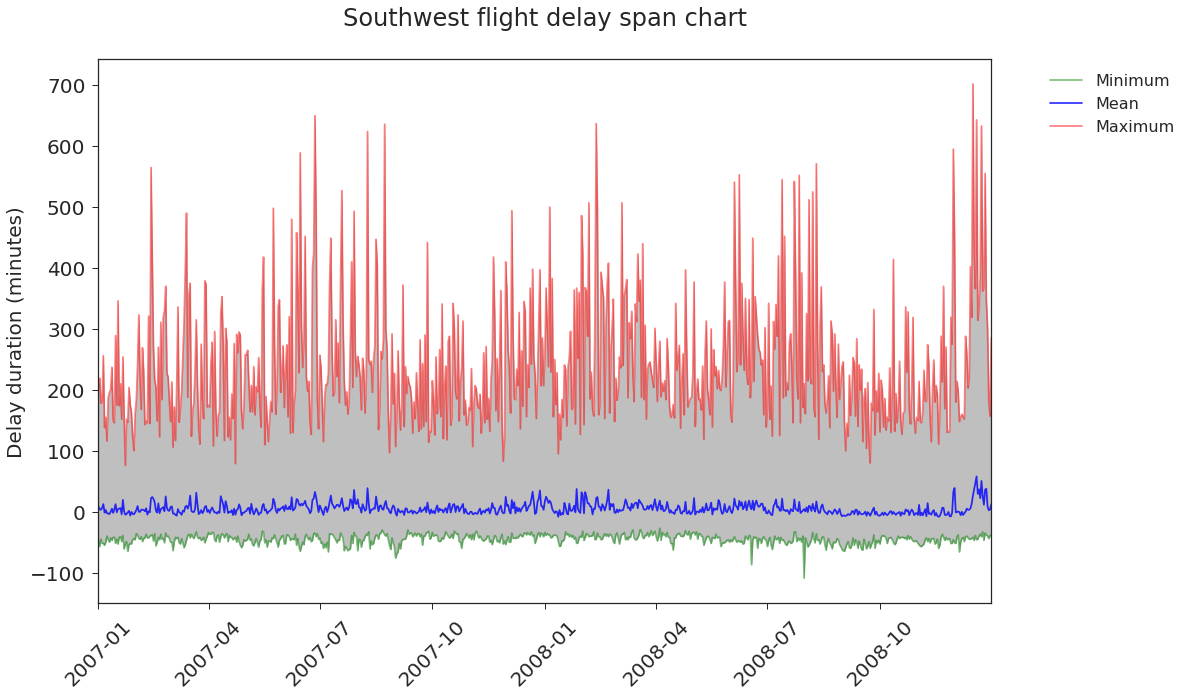

In [134]:
y1 = np.array(df[['ArrDelay']].groupby([df.index]).min()).reshape(731,)
y2 = np.array(df[['ArrDelay']].groupby([df.index]).mean()).reshape(731,)
y3 = np.array(df[['ArrDelay']].groupby([df.index]).max()).reshape(731,)

x = np.unique(df.index.values)

plt.figure(figsize=(16, 10))
plt.plot(x, y1, color='green', alpha=0.5)
plt.plot(x, y2, color='blue', alpha=0.8) 
plt.plot(x, y3, color='red', alpha=0.5)         
plt.fill_between(x, y1, y3, color='grey', alpha=0.5)

plt.ylabel('Delay duration (minutes)', fontsize=20)
plt.title('Southwest flight delay span chart\n', fontsize=24)
plt.legend(['Minimum', 'Mean', 'Maximum'], loc=2, fontsize=16, bbox_to_anchor=(1.05, 1))
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
axes = plt.gca()
axes.set_xlim([np.datetime64('2007-01-01T00:00:00.000000000'),np.datetime64('2008-12-31T00:00:00.000000000')])
plt.show()

# Cancelation

In [120]:
len(CancFlights)

22382

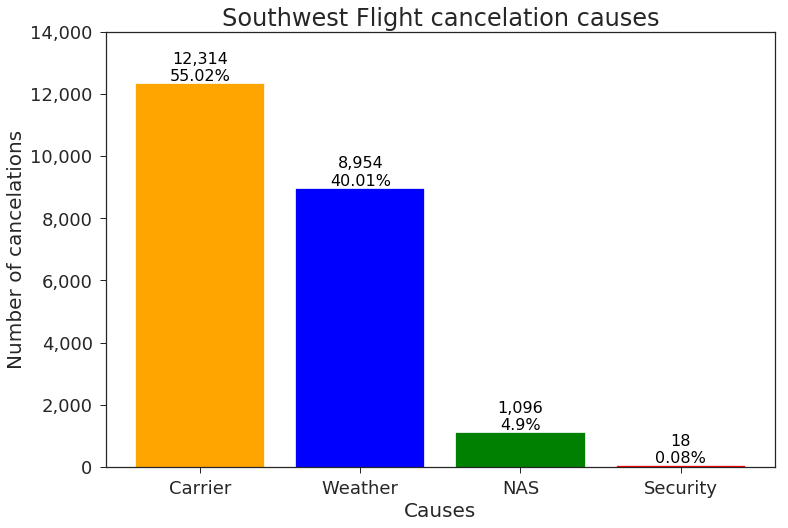

In [124]:
CancFlights = df[(df.Status == 4)]

z = df[['CancellationCode', 'Month']].groupby(['CancellationCode']).count()
codes = ['Carrier', 'Weather', 'NAS', 'Security']
plt.figure(figsize=(12, 8))
#plt.figure(figsize=(12, 8))
ind=np.arange(4)
plt.xticks(ind,(codes), fontsize=18)
p = plt.bar(ind, z.values.reshape(4,))
plt.ylabel('Number of cancelations', fontsize=20)
plt.title('Southwest Flight cancelation causes', fontsize=24)
plt.xlabel('Causes', fontsize=20)
plt.yticks(fontsize=18)
axes = plt.gca()
axes.set_ylim([0,14000])
for bar1 in p:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 100, str(format(int(bar1.get_height()), ','))+'\n'+str(round(100*int(bar1.get_height())/len(CancFlights),2))+'%',
                    ha='center', color='black', fontsize=16)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
p[0].set_color('orange')
p[1].set_color('blue')
p[2].set_color('green')
p[3].set_color('red')
plt.show()

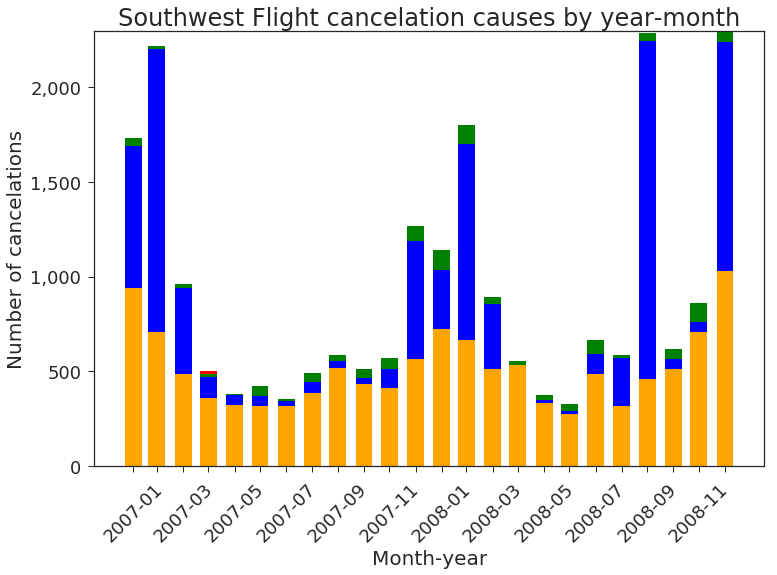

In [117]:
#Could be side-by-side with previous one, previous one could have the same color coding

g = df[['CarrierCancelation','WeatherCancelation', 'NasCancelation', 'SecurityCancelation']].groupby(pd.Grouper(freq="M"))
g = g.sum()

plt.figure(figsize=(12, 8))
b = plt.bar(g.index, g['CarrierCancelation'].values, width=20, color='orange')
b = plt.bar(g.index, g['WeatherCancelation'].values, width=20, bottom=g['CarrierCancelation'].values, color='blue')
b = plt.bar(g.index, g['NasCancelation'].values, width=20, 
            bottom = (g['CarrierCancelation'].values+g['WeatherCancelation'].values), color='green')
b = plt.bar(g.index, g['SecurityCancelation'].values, width=20,
       bottom = (g['CarrierCancelation'].values+g['WeatherCancelation'].values+g['NasCancelation'].values), color='red')
plt.title('Southwest Flight cancelation causes by year-month', fontsize=24)
plt.ylabel('Number of cancelations', fontsize=20)
plt.xlabel('Month-year', fontsize=20)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(g.index.values)

for label in ax.get_xaxis().get_ticklabels():
    label.set_visible(False)
    
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(True)

plt.show()

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

plt.figure(figsize=(20, 20)) 
# The NetworkX part
# put map projection coordinates in pos dictionary
G = nx.DiGraph()
flights = df[['Year', 'Origin', 'Dest']].groupby(['Origin', 'Dest']).count()
flights = [(x[0], x[1], flights.loc[x].values[0]) for x in flights.index]
G.add_weighted_edges_from(flights)

pos=df.set_index('Origin')['lon-lat'].to_dict()
for key, value in pos.items():
    pos[key]=m(value[0], value[1])
# draw
nx.draw_networkx(G,pos,node_size=800,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
#plt.title('SouthWest connection directed graph')
plt.show()

ImportError: No module named 'mpl_toolkits.basemap'

In [15]:
G.edges.data()

OutEdgeDataView([('ABQ', 'AMA', {'weight': 992}), ('ABQ', 'BWI', {'weight': 911}), ('ABQ', 'DAL', {'weight': 5757}), ('ABQ', 'DEN', {'weight': 1453}), ('ABQ', 'ELP', {'weight': 1765}), ('ABQ', 'HOU', {'weight': 2053}), ('ABQ', 'LAS', {'weight': 4727}), ('ABQ', 'LAX', {'weight': 2820}), ('ABQ', 'LBB', {'weight': 731}), ('ABQ', 'MAF', {'weight': 731}), ('ABQ', 'MCI', {'weight': 1385}), ('ABQ', 'MCO', {'weight': 1459}), ('ABQ', 'MDW', {'weight': 1457}), ('ABQ', 'OAK', {'weight': 2073}), ('ABQ', 'PDX', {'weight': 731}), ('ABQ', 'PHX', {'weight': 7337}), ('ABQ', 'SAN', {'weight': 2103}), ('ABQ', 'SEA', {'weight': 1294}), ('ABQ', 'SLC', {'weight': 1131}), ('ABQ', 'STL', {'weight': 731}), ('ABQ', 'TPA', {'weight': 731}), ('ABQ', 'TUS', {'weight': 1439}), ('AMA', 'ABQ', {'weight': 999}), ('AMA', 'DAL', {'weight': 5359}), ('AMA', 'DEN', {'weight': 845}), ('AMA', 'LAS', {'weight': 731}), ('BWI', 'ABQ', {'weight': 914}), ('BWI', 'ALB', {'weight': 4717}), ('BWI', 'AUS', {'weight': 1457}), ('BWI', 

In [162]:
print("Southwest fleet is operating from {} airports".format(len(G.nodes())))
print("Southwest has {} connections between these airports".format(len(G.edges())))

Southwest fleet is operating from 64 airports
Southwest has 916 connections between these airports


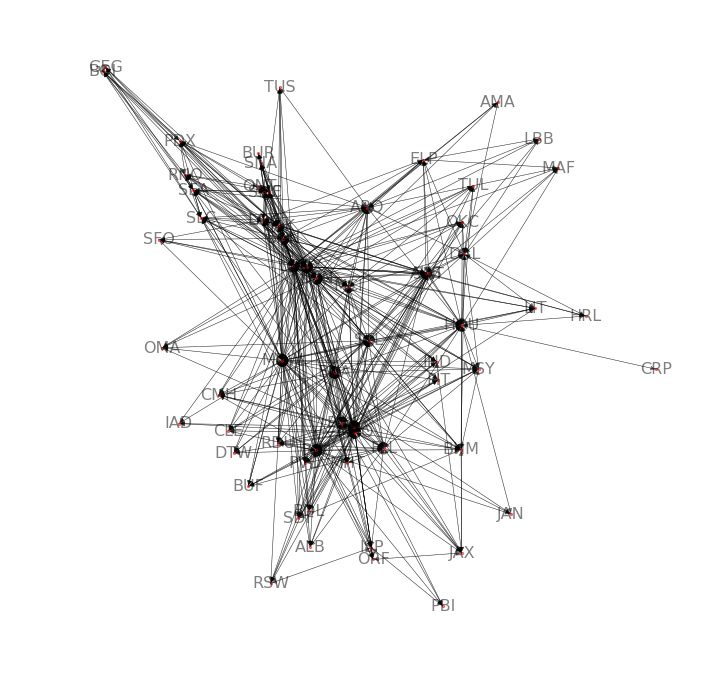

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(G, ax=ax, node_size=5,
                 font_size=16, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [35]:
G.degree()

AttributeError: 'DiDegreeView' object has no attribute 'values'

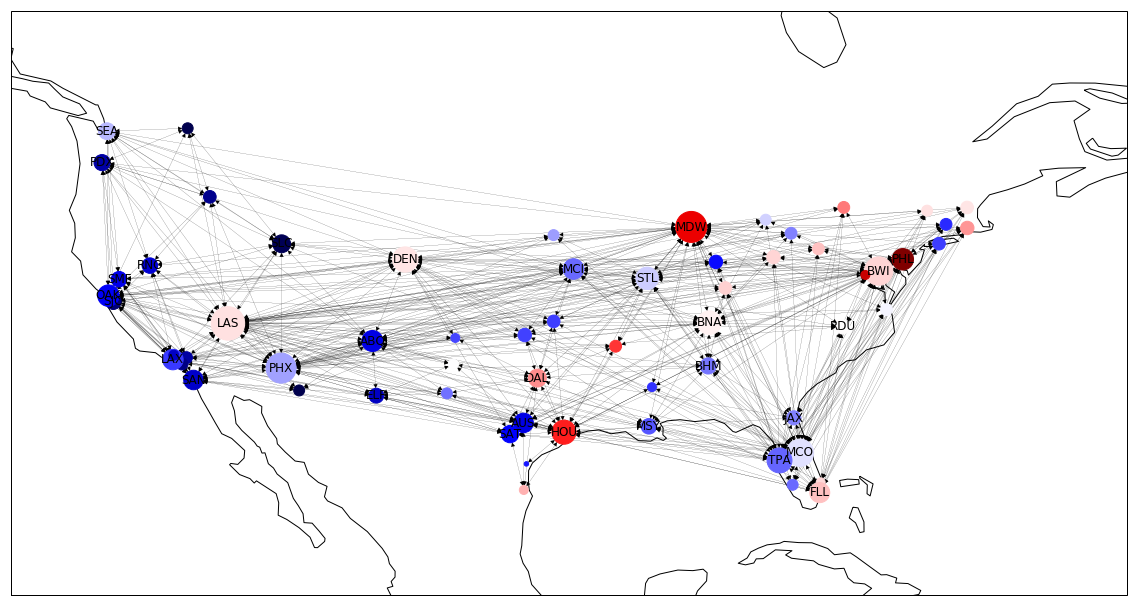

In [27]:
pos=df.set_index('Origin')['lon-lat'].to_dict()

#G = nx.DiGraph()
#flights = df[['Year', 'Origin', 'Dest']].groupby(['Origin', 'Dest']).count()
#flights = [(x[0], x[1], flights.loc[x].values[0]) for x in flights.index]
#G.add_weighted_edges_from(flights)

deg = nx.degree(G)
sizes = [10 * deg[iata] for iata in G.nodes]

delay = df_all[['Origin', 'DepDelay']].groupby(['Origin']).mean()
delay = [delay.loc[iata].values[0] for iata in G.nodes]

labels = {iata: iata if deg[iata] >= 20 else ''
          for iata in G.nodes}

# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(20, 16),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(G, ax=ax,
                 font_size=12,
                 alpha=1,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=delay,
                 cmap=plt.cm.seismic)

In [16]:
tst = df[['Year', 'Origin', 'Dest']].groupby(['Origin', 'Dest']).count()
flight_counts = tst.rename(columns={'Year': 'Count'},index=str)
flight_counts = flight_counts.reset_index()
flight_counts = flight_counts.sort_values(by='Count', ascending=False)
flight_counts[:10]
#Show 10 most frequent connections

,Origin,Dest,Count
273,HOU,DAL,19424
181,DAL,HOU,19421
401,LAX,OAK,13904
566,OAK,LAX,13869
574,OAK,SAN,12743
747,SAN,OAK,12737
663,PHX,LAS,12706
373,LAS,PHX,12588
560,OAK,BUR,11031
115,BUR,OAK,11025


In [17]:
flight_counts[-10:]
#Shows least frequent connections

,Origin,Dest,Count
818,SLC,MCO,17
485,MCO,SLC,17
475,MCO,OMA,9
907,TUL,MCO,9
487,MCO,TUL,9
590,OMA,MCO,9
474,MCO,OKC,9
585,OKC,MCO,9
652,PHX,BOI,2
103,BOI,PHX,2


In [18]:
#df_all['long_x_rad'] = df_all['long_x'].apply(math.radians)
#df_all['long_y_rad'] = df_all['long_y'].apply(math.radians)
#df_all['lat_x_rad'] = df_all['lat_x'].apply(math.radians)
#df_all['lat_y_rad'] = df_all['lat_y'].apply(math.radians)

In [19]:
#df_all['distance'] = 2 * np.arctan2(np.sqrt((np.sin((df_all['lat_y_rad'] - df_all['lat_x_rad'])/2)**2 +
#                                     np.cos(df_all['lat_x_rad']) * np.cos(df_all['lat_y_rad']) * 
#                                     np.sin((df_all['long_y_rad'] - df_all['long_x_rad'])/2)**2)), 
#                               np.sqrt(1-(np.sin((df_all['lat_y_rad'] - df_all['lat_x_rad'])/2)**2 +
#                                     np.cos(df_all['lat_x_rad']) * np.cos(df_all['lat_y_rad']) * 
#                                     np.sin((df_all['long_y_rad'] - df_all['long_x_rad'])/2)**2))) * 6372.0 * 0.621371192

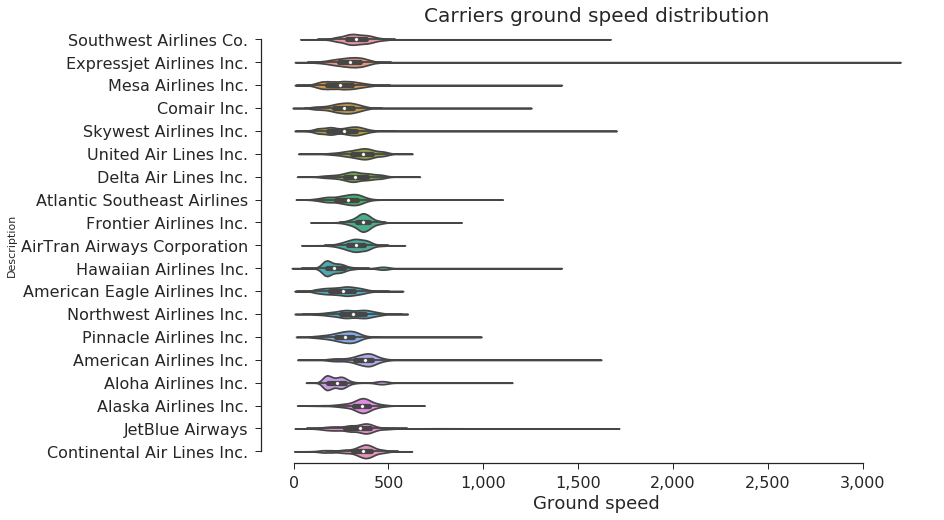

In [20]:
sns.set_context("notebook", font_scale=2.5)
plt.figure(figsize=(12, 8))
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="GroundSpeed", y="Description", data=df_all);
plt.title('Carriers ground speed distribution', fontsize=20)
#plt.ylabel('Carriers', fontsize=18)
plt.xlabel('Ground speed', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.despine(trim=True)

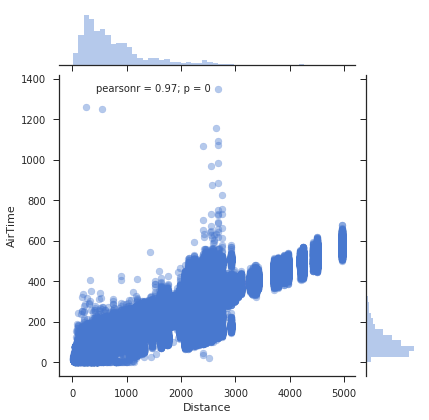

In [21]:
plt.figure(figsize=(12, 8))
sns.jointplot(df_all['Distance'], df_all['AirTime'], alpha=0.4)

In [22]:
outliers = df_all[df_all['GroundSpeed']>800]

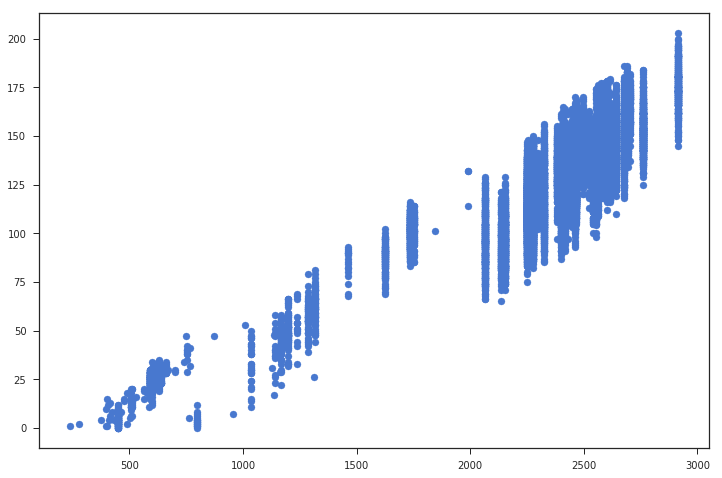

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(outliers['Distance'], outliers['AirTime'])

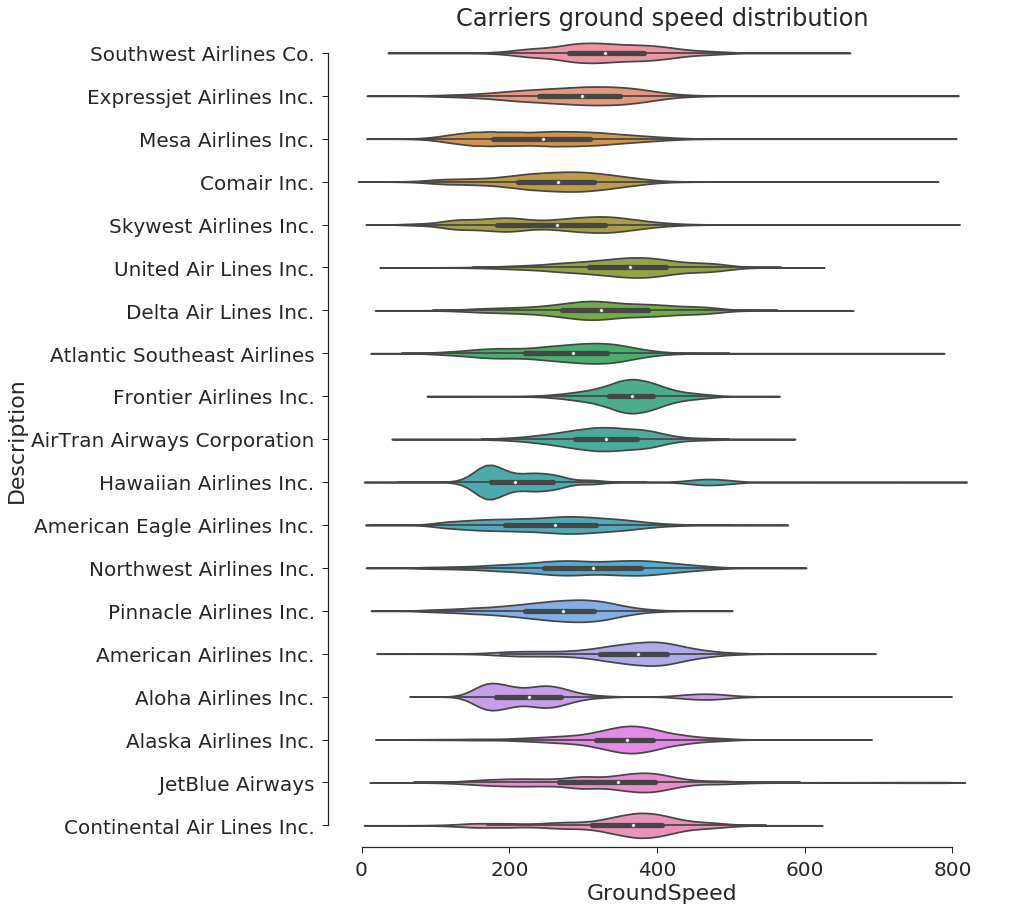

In [147]:
#df_all = df_all[df_all['AirSpeed']<800]
plt.figure(figsize=(12, 15))
#sns.set_context("notebook", font_scale=2)
sns.set(style="ticks", palette="muted", color_codes=True, font_scale = 2)
ax = sns.violinplot(x="GroundSpeed", y="Description", data=df_all[df_all['GroundSpeed']<800]);
plt.title('Carriers ground speed distribution', fontsize=24)
#plt.ylabel('Carriers', fontsize=18)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.despine(trim=True)

In [25]:
airport_mean_delays = pd.DataFrame(pd.Series(df_all['airport_x'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = df_carriers.set_index('Code')['Description'].to_dict()
identify_airport = df_airports.set_index('iata')['city'].to_dict()

# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#___________________________________________________________

for carrier in abbr_companies.keys():
    try:
        fg1 = df_all[df_all['UniqueCarrier'] == carrier]
        test = fg1['DepDelay'].groupby(df_all['airport_x']).apply(get_stats).unstack()
        airport_mean_delays[carrier] = test.loc[:, 'mean']
    except:
        pass

In [155]:
len(np.unique(df_all['Origin'].values))

312

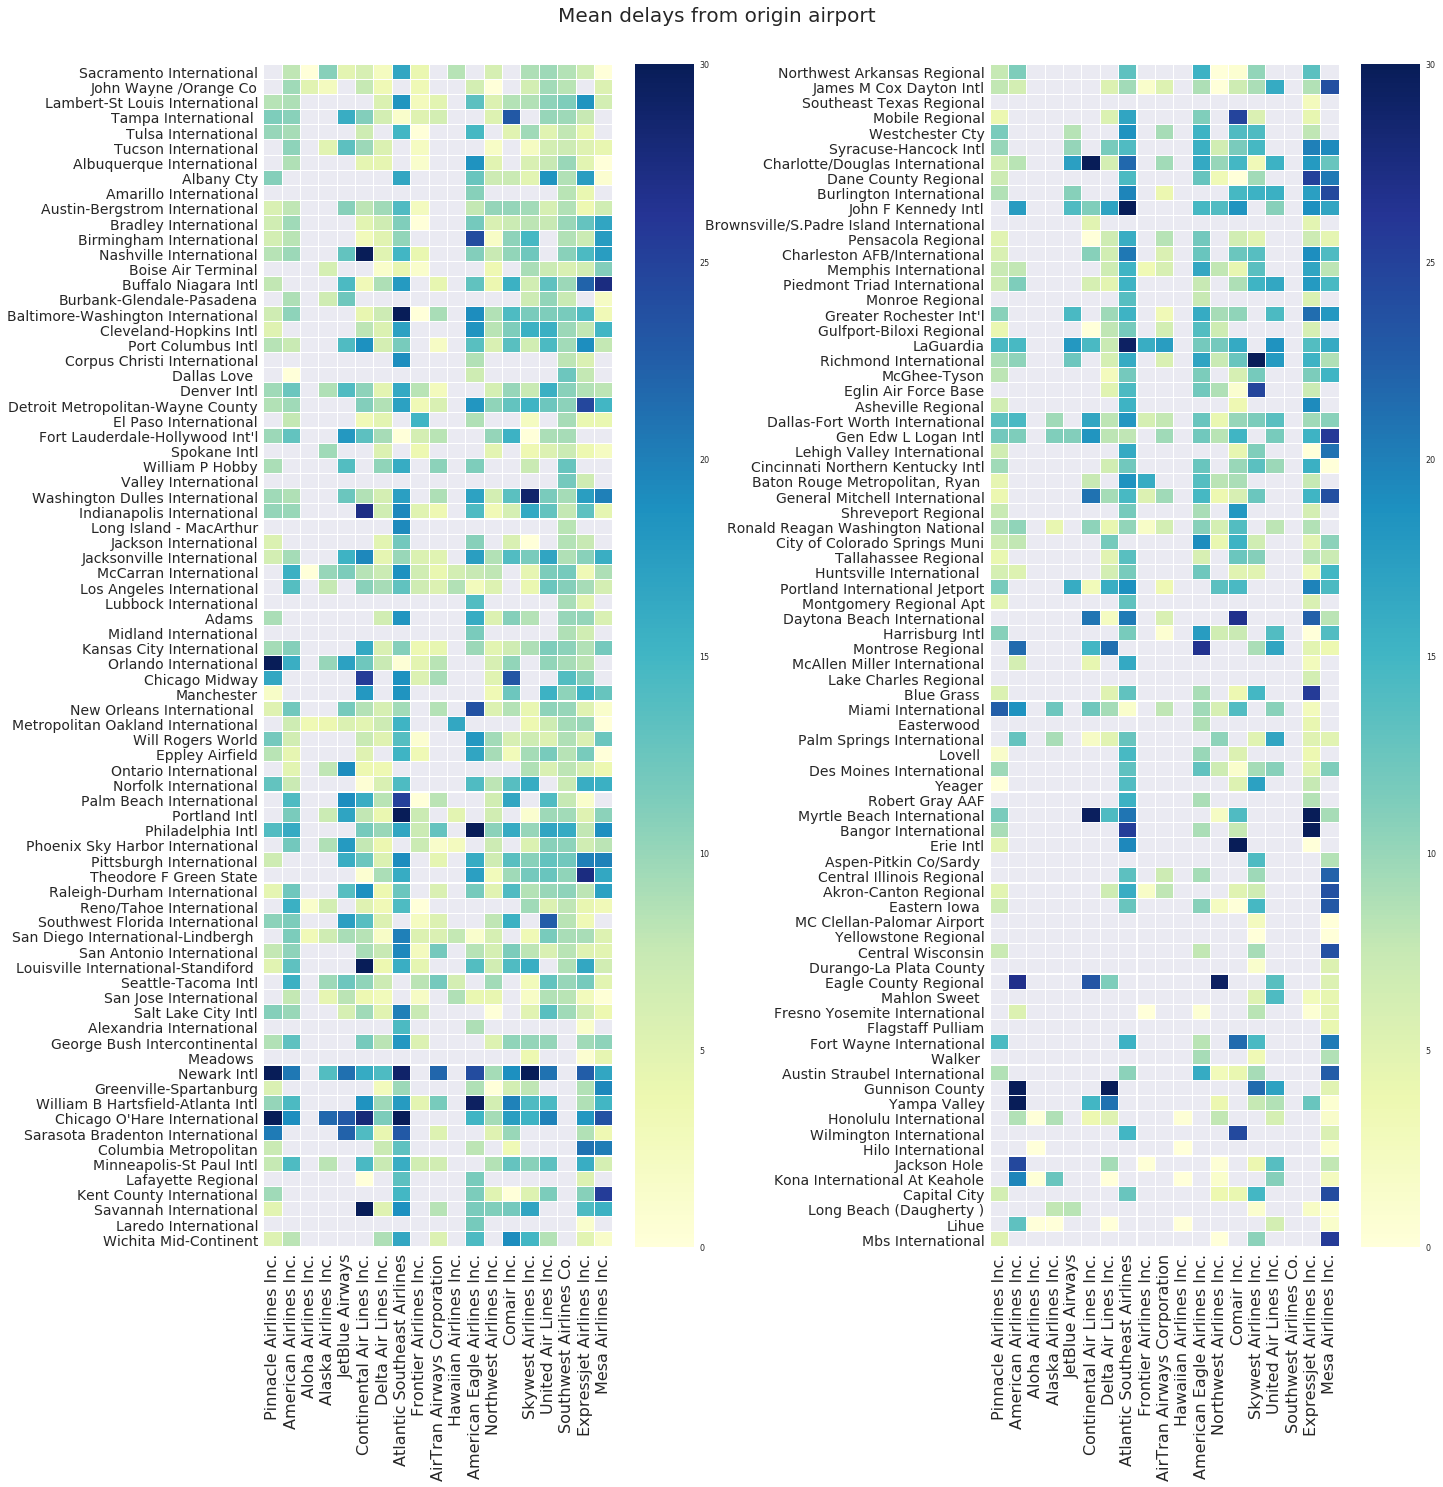

In [158]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(20,20))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:78,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=16) ;
plt.setp(ax.get_yticklabels(), fontsize=14) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[78:156,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Mean delays from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=16) ;
plt.setp(ax.get_yticklabels(), fontsize=14) ;
ax.yaxis.label.set_visible(False)


plt.tight_layout()


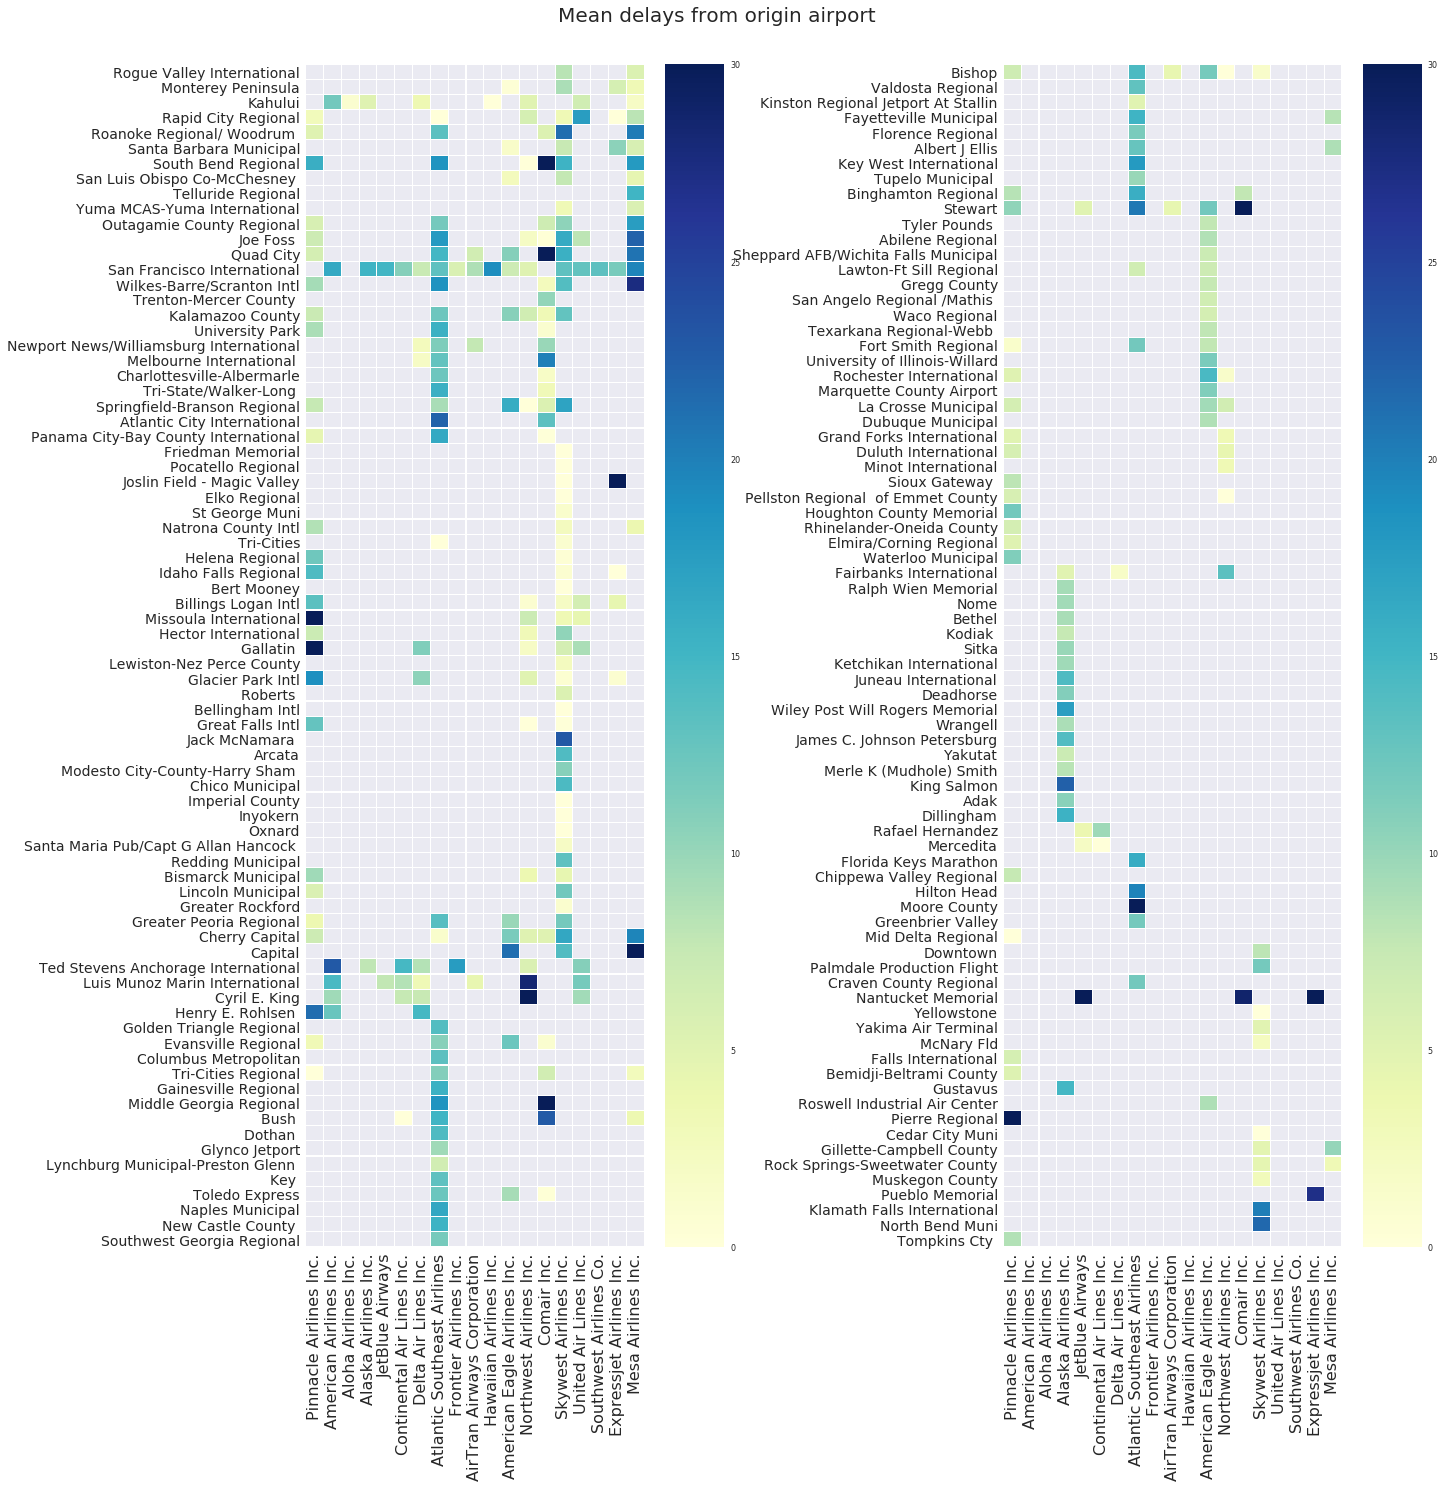

In [159]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(20,20))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[156:234,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=16) ;
plt.setp(ax.get_yticklabels(), fontsize=14) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[234:312,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Mean delays from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=16) ;
plt.setp(ax.get_yticklabels(), fontsize=14) ;
ax.yaxis.label.set_visible(False)


plt.tight_layout()


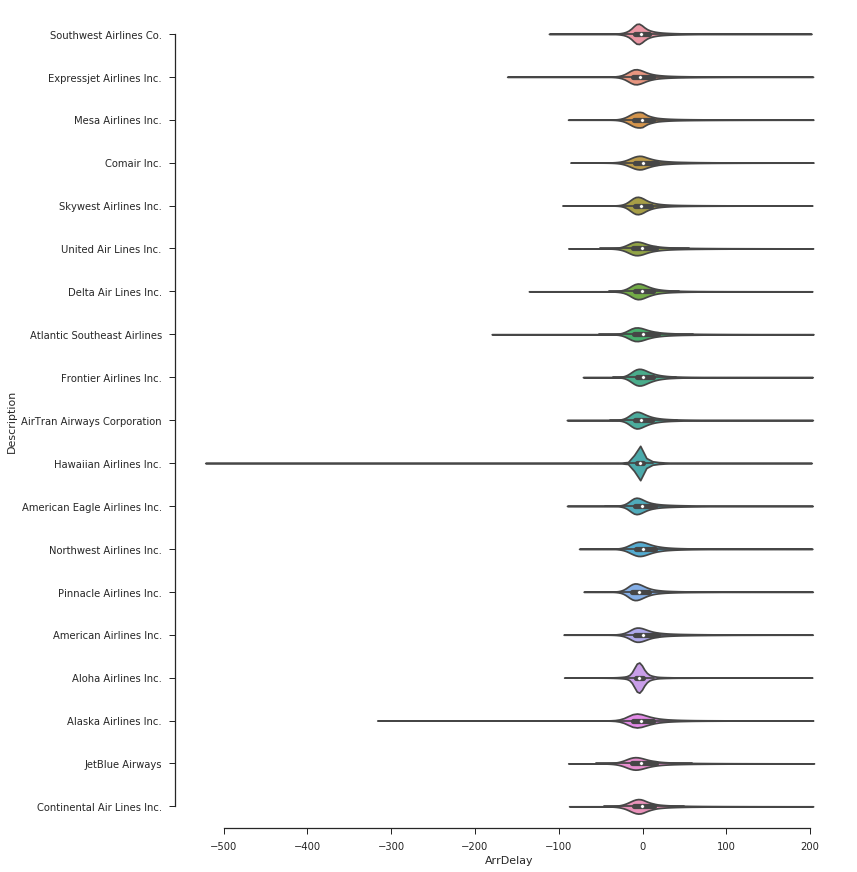

In [27]:
plt.figure(figsize=(12, 15))
sns.set_context("notebook", font_scale=2.5)
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.violinplot(x="ArrDelay", y="Description", data=df_all[df_all['ArrDelay']<200]);
sns.despine(trim=True)